# XID+IR_SED_Analysis
This notebook takes the posterior of the XID+IR_SED run and examines outputs with some useful visualisation

In [1]:
from astropy.io import ascii, fits
import pylab as plt
%matplotlib inline
from astropy import wcs


import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import pandas as pd
import seaborn as sns

In [3]:
# load up run
priors,posterior=xidplus.load(filename='./test_SPM_mrr.pkl')

## Plot maps
1. The actual maps
2. The posterior sample maps
3. The Bayesian P value map

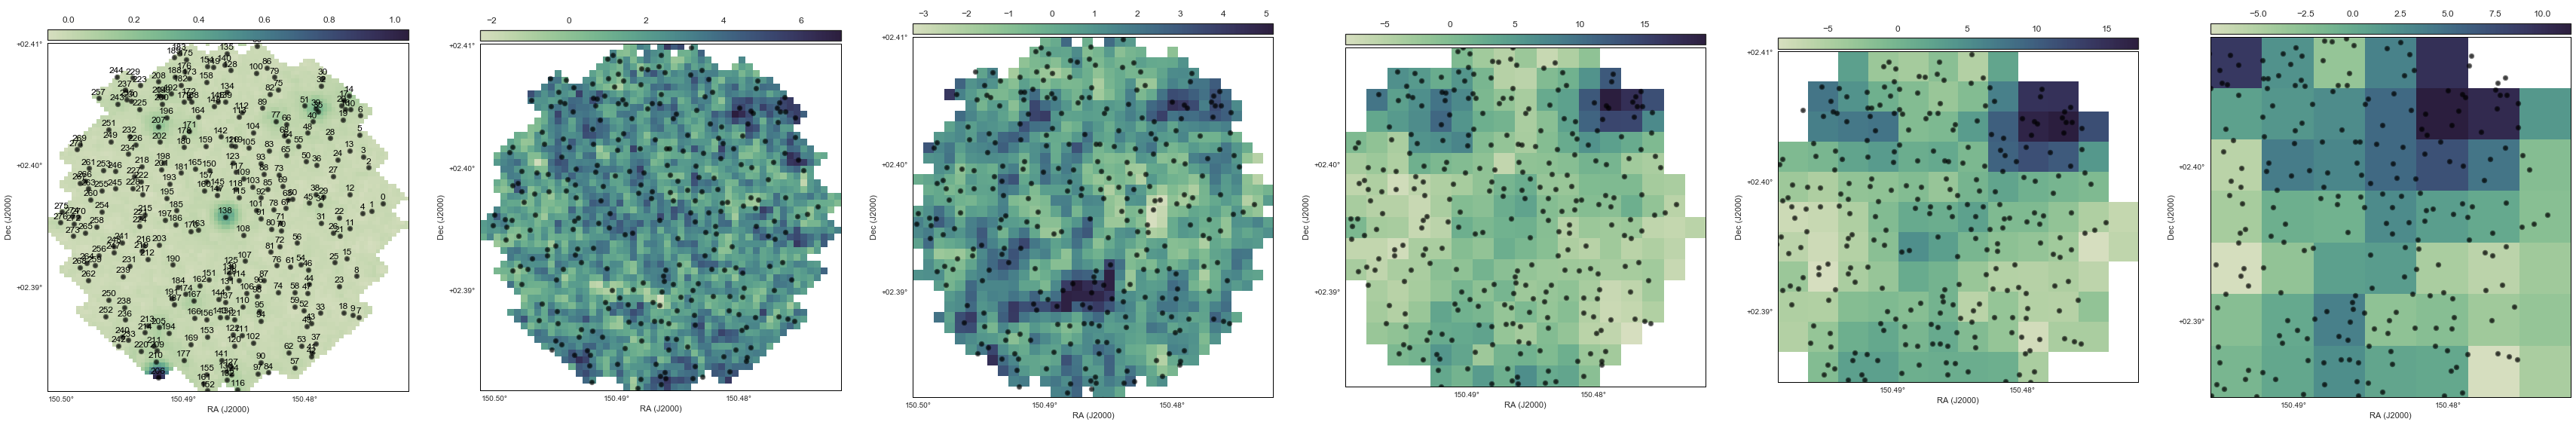

In [4]:
from xidplus import plots
orig_map=plots.plot_map(priors);
for i in range(0,priors[0].nsrc):
    orig_map[0][0].add_label(priors[0].sra[i], priors[0].sdec[i]+0.0005, np.arange(0,priors[0].nsrc)[i], relative=False)
for i in range(0,6):
    orig_map[0][i].show_markers(priors[0].sra, priors[0].sdec, edgecolor='black', facecolor='black',
                marker='o', s=50, alpha=0.5)

In [5]:
orig_map[0][0].show_markers(priors[0].sra, priors[0].sdec, edgecolor='black', facecolor='black',
                marker='o', s=50, alpha=0.5)


In [6]:
movie=plots.replicated_map_movie(priors,posterior, 5)

In [7]:
movie

([<aplpy.core.FITSFigure at 0x1111a46d8>,
 <matplotlib.figure.Figure at 0x119531518>)

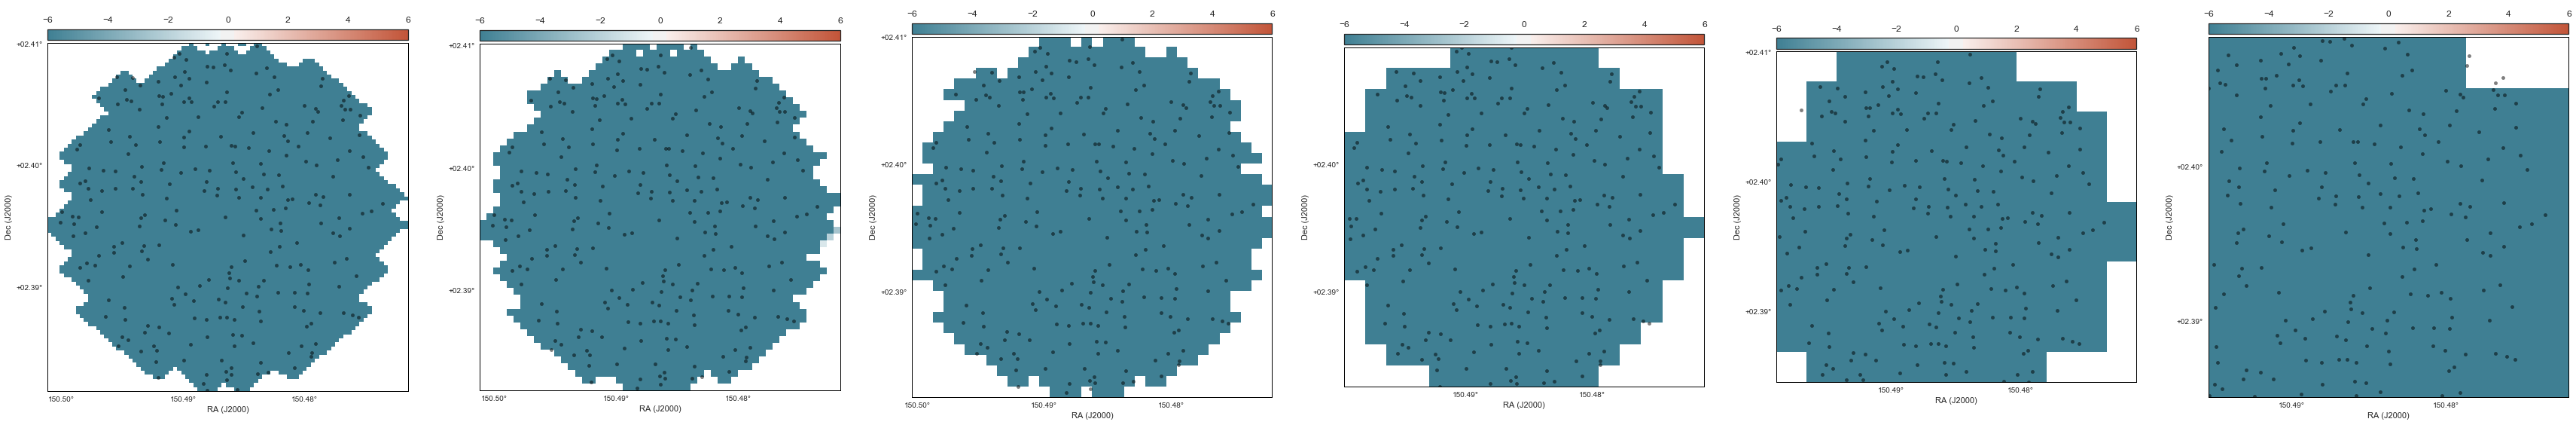

In [8]:
plots.plot_Bayes_pval_map(priors, posterior)

## 2D marginalised plot for fluxes

### Choose which source we want to look at


In [9]:
s1=138


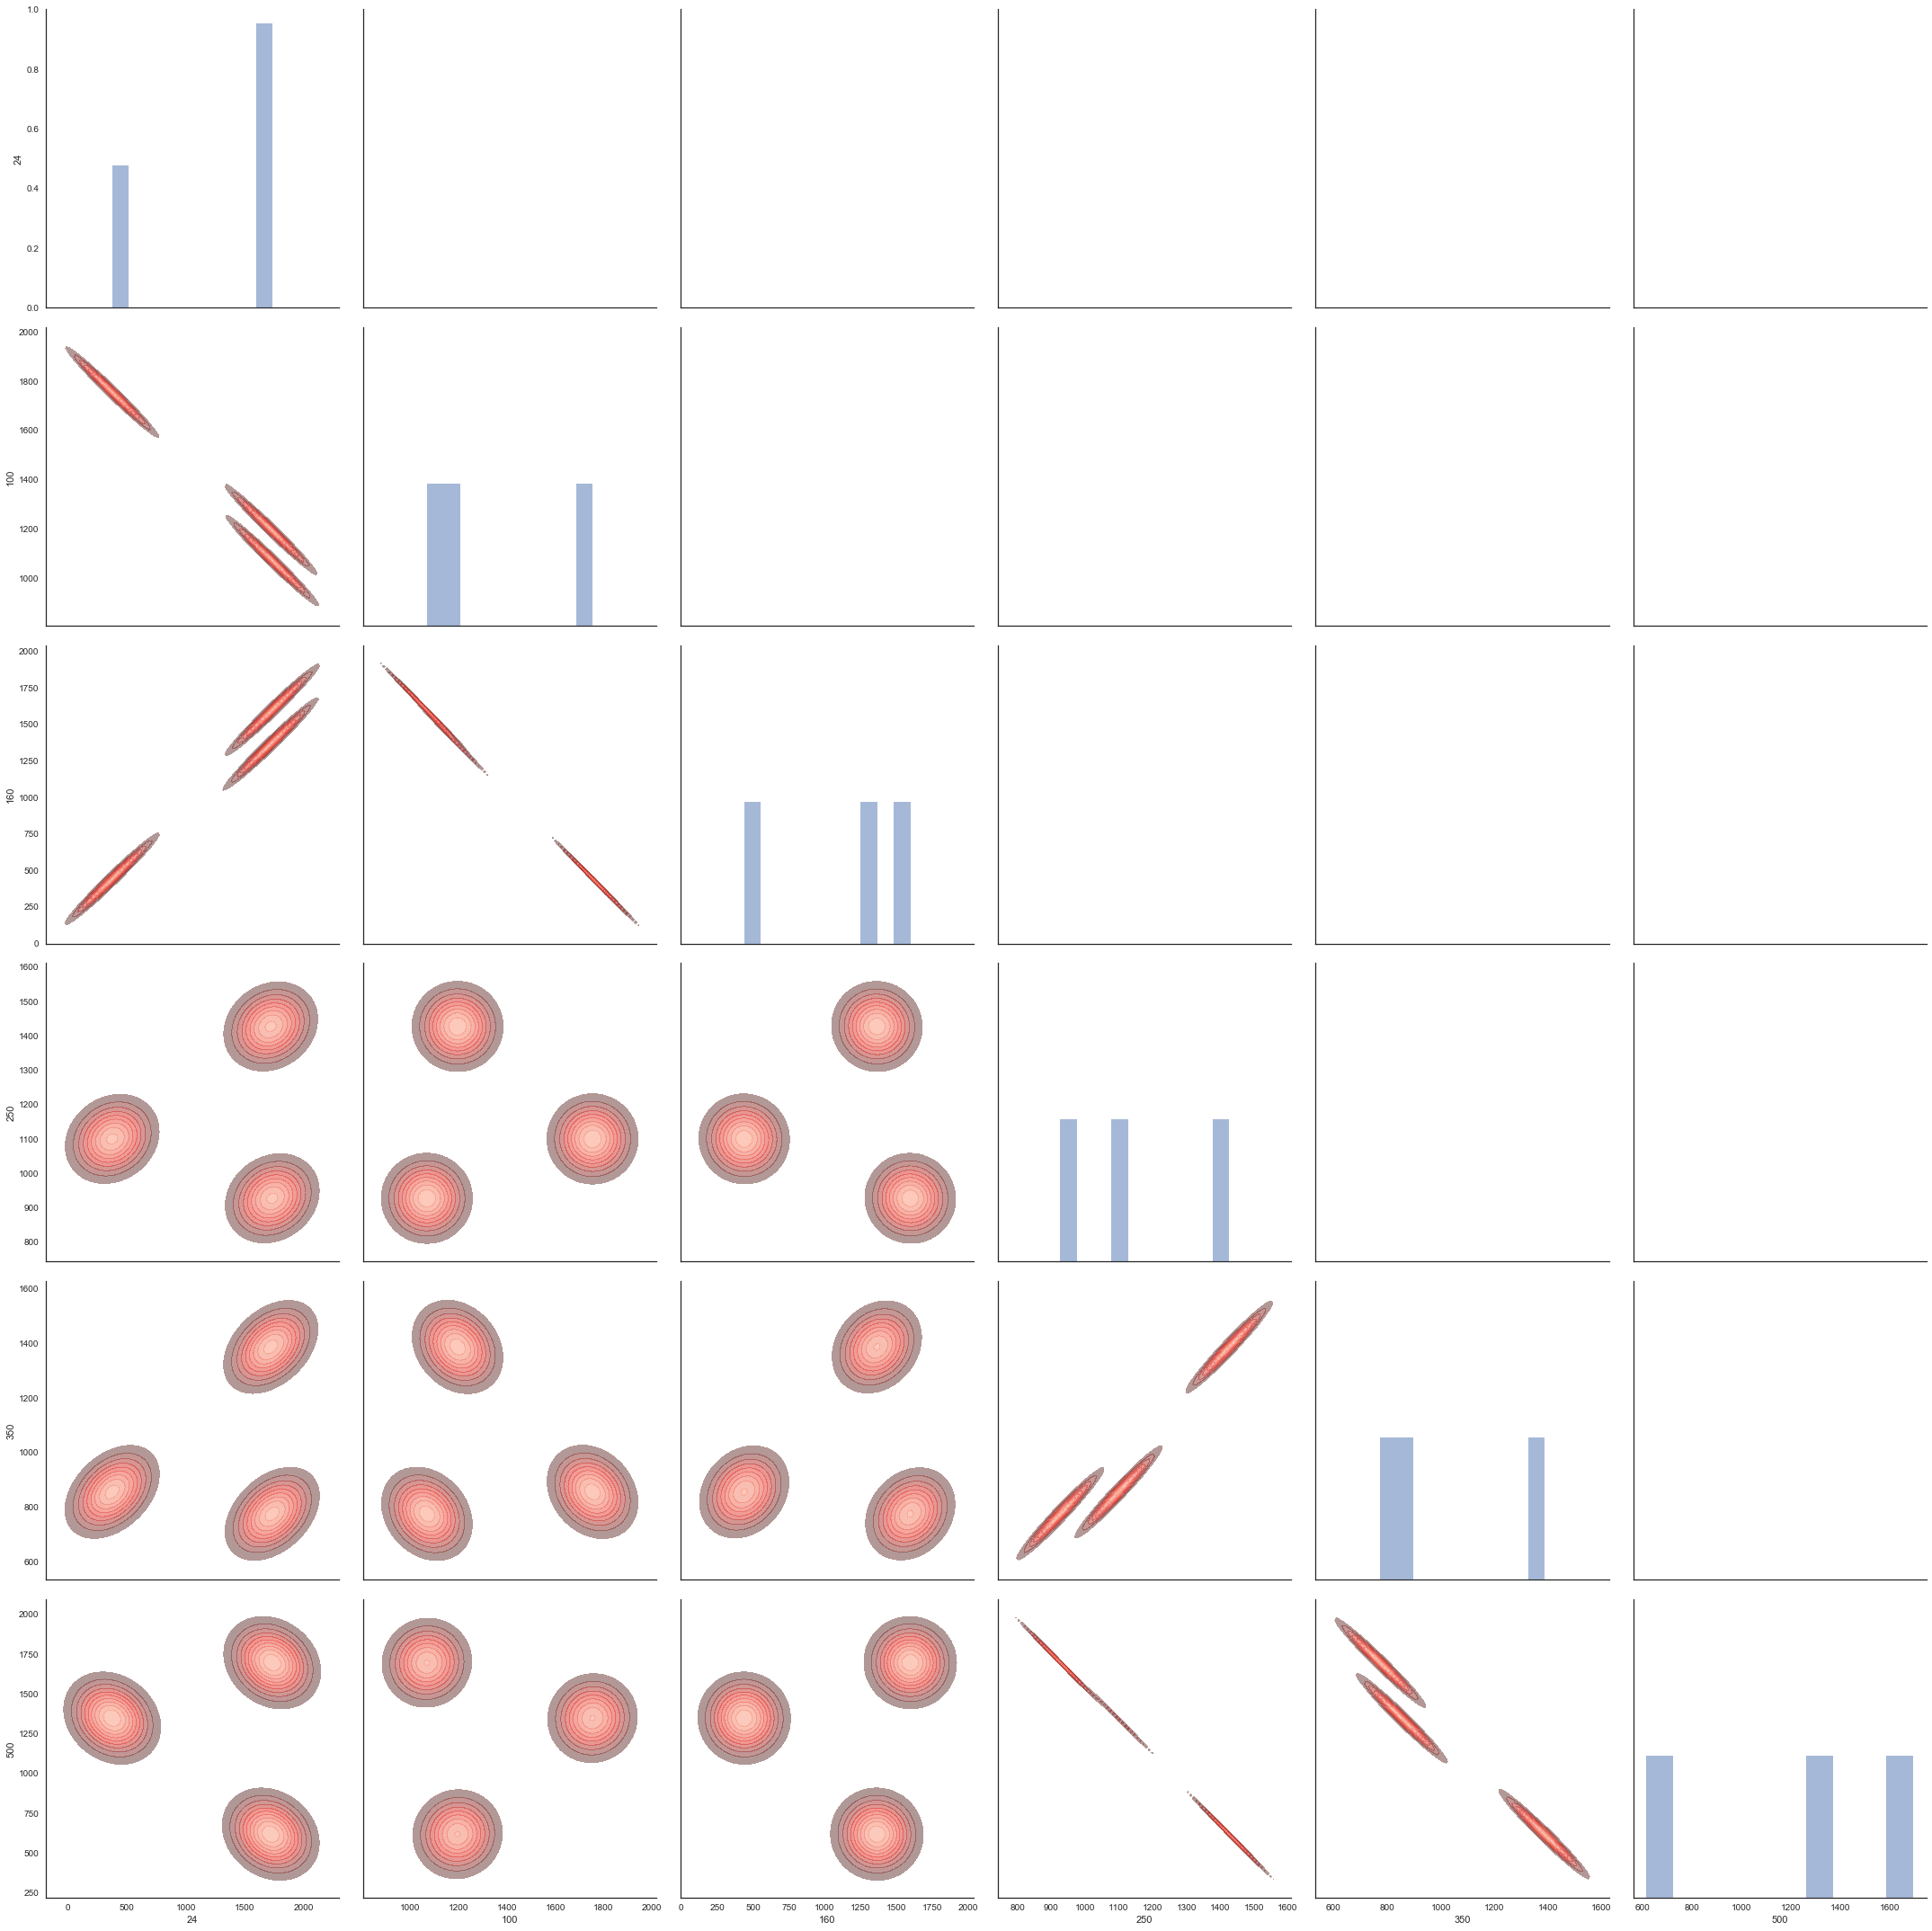

In [10]:
df = pd.DataFrame(posterior.samples['src_f'][0:1500,:,s1],columns=[ '24','100', '160','250', '350', '500'])
g = sns.PairGrid(df,size=5)
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.kdeplot, cmap="Reds_d",alpha=0.5,n_levels=10,normed=True, shade=True,shade_lowest=False)


## Plot Posterior SED fit samples

In [33]:
from xidplus import sed
SEDs,df =sed.mrr_templates()

0.0001
0.0001
0.0001
0.0001


In [35]:
df['wave']

0     1450.106836
1     1200.107086
2     1000.000000
3      831.955314
4      691.990289
5      575.042575
6      478.960832
7      398.015514
8      330.978665
9      274.979299
10     228.981291
11     190.989724
12     158.019251
13     132.010963
14     109.999320
15     100.000000
16      91.201084
17      75.892699
18      63.095734
19      60.006735
20      52.504920
21      43.701868
22      36.298610
23      30.200213
24      24.998273
25      20.897773
26      17.398027
27      14.501068
28      12.001071
29      11.601122
30      11.301081
31      10.999932
32      10.899084
33       9.709570
34       9.399397
35       8.990834
36       8.590135
37       8.390735
38       8.199738
39       7.689534
40       7.000032
41       6.609978
42       6.369422
43       6.190133
44       6.029760
45       5.850595
46       4.799544
47       3.400165
48       3.339566
49       3.299894
50       3.269565
51       3.160094
52       3.069729
53       2.690296
54       2.511886
55       1

AttributeError: 'DataFrame' object has no attribute 'find'

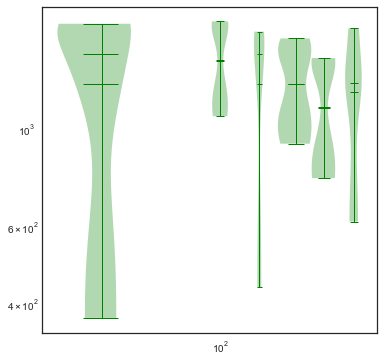

In [15]:
sns.set_style("white")

plt.figure(figsize=(6,6))
from astropy.cosmology import Planck13

violin_parts=plt.violinplot(posterior.samples['src_f'][:,3:6,s1],[250,350,500], points=60, widths=100,
                      showmeans=True, showextrema=True, showmedians=True,bw_method=0.5)
# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor('green')
    vp.set_linewidth(1)

for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

violin_parts=plt.violinplot(posterior.samples['src_f'][:,0:3,s1],[24,100,160], points=60, widths=20,showmeans=True, showextrema=True, showmedians=True,bw_method=0.5)
# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor('green')
    vp.set_linewidth(1)

for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

import astropy.units as u

for s in range(0,1500,20):
    z= posterior.samples['z'][s,s1]
    div=(4.0*np.pi * np.square(Planck13.luminosity_distance(z).cgs))
    div=div.value
   
    plt.loglog((z+1.0)*df['wave'],np.power(10.0,posterior.samples['Nbb'][s,s1])*(1.0+z)*df[df.columns[np.arange(1,posterior.samples['p'].shape[2]+1)
                                        [np.random.multinomial(1, posterior.samples['p'][s,s1,:])==1]]]/div,alpha=0.05,c='b',zorder=0)
    
    #plt.plot([250,350,500, 24,100,160],posterior_IR.samples['src_f'][s,0:6,s1], 'ko', alpha=0.1, ms=10)
    #plt.plot([250,350,500],posterior.samples['src_f'][s,0:3,s1], 'ro', alpha=0.1, ms=10)
    


plt.ylim(10E-7,10E2)
plt.xlim(5,5E3)
#plt.plot([3.6,4.5,5.7,7.9],[2.91E-3,2.38E-3,2.12E-3,9.6E-3], 'ro')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux (mJy)')

## Plot Table of probabilities for SED type

ValueError: zero-size array to reduction operation minimum which has no identity

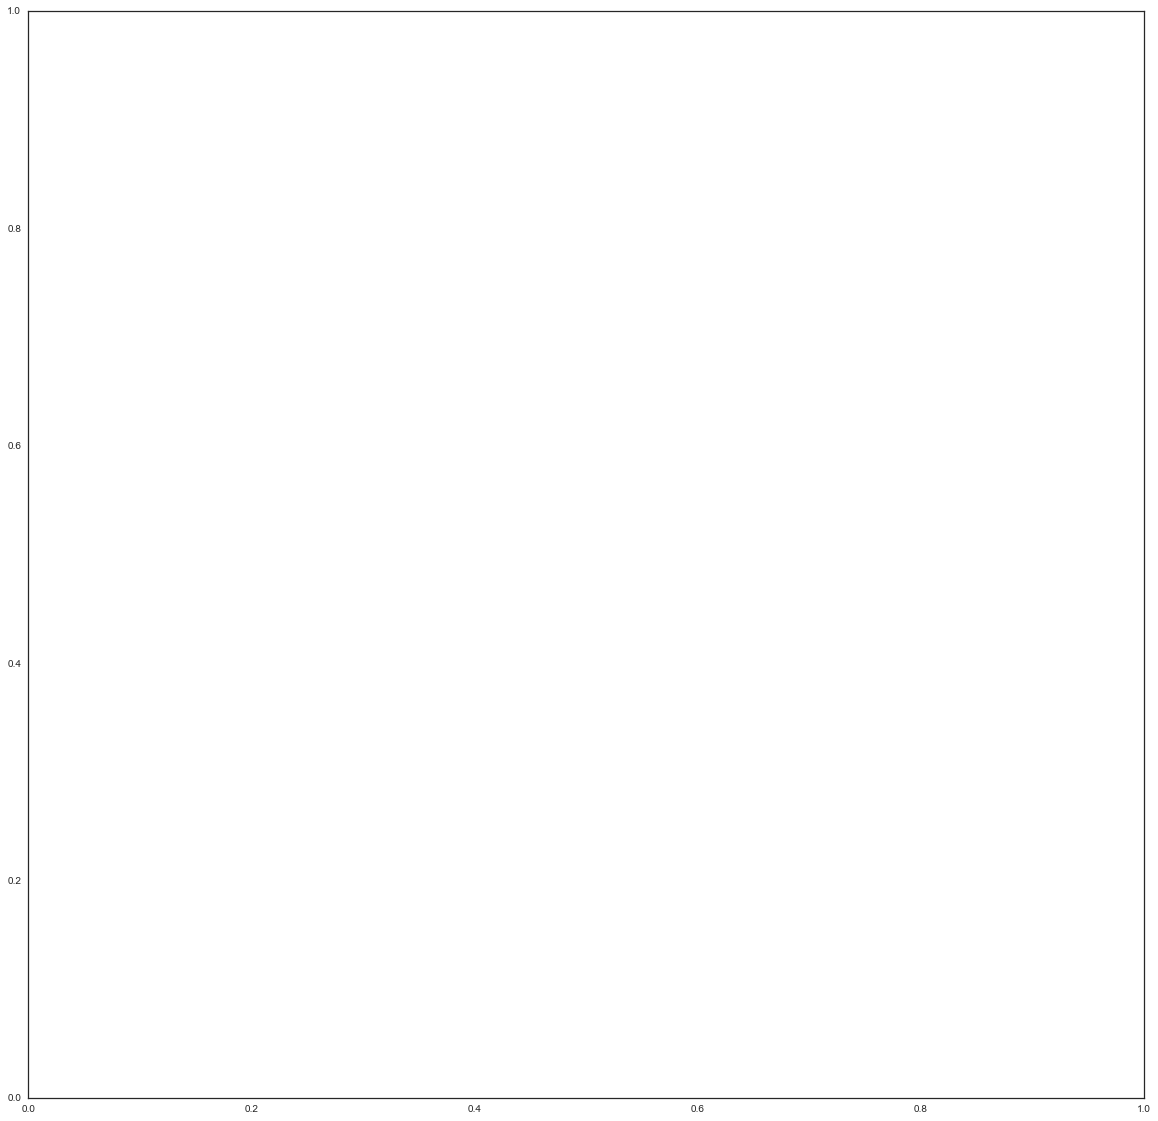

In [16]:
df=pd.DataFrame(np.log10(posterior.samples['p'][:,s1,:]),columns=df.columns.tolist()[1:])
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df,annot=False, ax=ax)
ax.set_yticklabels('None')
ax.set_ylabel('Iteration')

## Plot Marginalised LIR

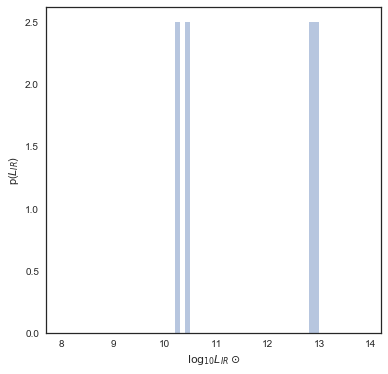

In [17]:
plt.figure(figsize=(6,6))
plt.hist(posterior.samples['Nbb'][:,s1], bins=np.arange(8,14,0.1),normed=True, alpha=0.4);
plt.xlabel(r'$\log_{10}L_{IR}\odot$')
plt.ylabel(r'p($L_{IR}$)')

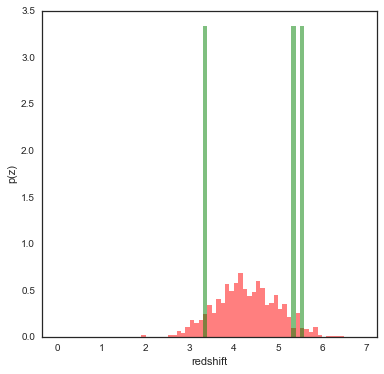

In [18]:
plt.figure(figsize=(6,6))
plt.hist(np.random.normal(priors[0].z_median[s1],priors[0].z_sig[s1],size=1000),bins=np.arange(0,7, 0.1),normed=True,color='red', alpha=0.5);
plt.hist(posterior.samples['z'][0:1500,s1],bins=np.arange(0,7, 0.1),normed=True, alpha=0.5, color='green');
plt.xlabel('redshift')
plt.ylabel('p(z)')

## Appendix:
### Examining chains
To check runs look sensible,we can look at the samples and see if there is any drastic change between each chain. The chains are concatenated, so plotting the sample for any parameter on its own will cycle through each chain.

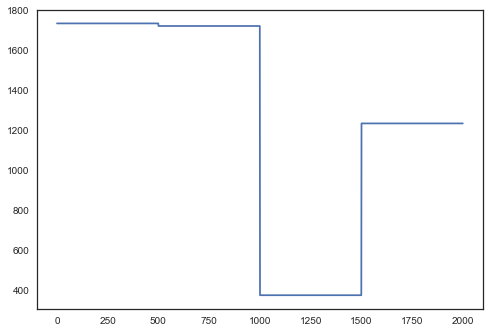

In [25]:
plt.plot(posterior.samples['src_f'][:,0,s1])

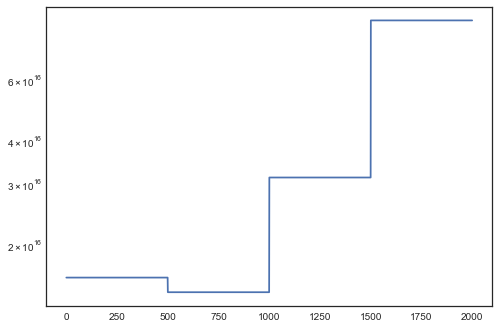

In [67]:
plt.semilogy(np.abs(posterior.samples['lp__']))

In [26]:
posterior.n_eff

{'Nbb': array([    2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,  2000.,     2.,     2.,     2.,
         2000.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,     2.,     2.,
            2.,     2.,     2.,     2.,     2.,     2.,  

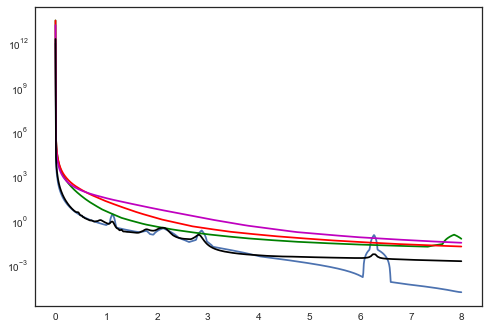

In [55]:
red=np.arange(0,8,0.01)
red[0]=0.000001
plt.semilogy(red,SEDs[0,0,:]*np.power(10.0,12))
plt.semilogy(red,SEDs[0,1,:]*np.power(10.0,12),c='g')
plt.semilogy(red,SEDs[0,2,:]*np.power(10.0,12),c='r')
plt.semilogy(red,SEDs[0,3,:]*np.power(10.0,12),c='m')
plt.semilogy(red,SEDsb[0,0,:]*np.power(10.0,12),c='k')


(0.01, 10)

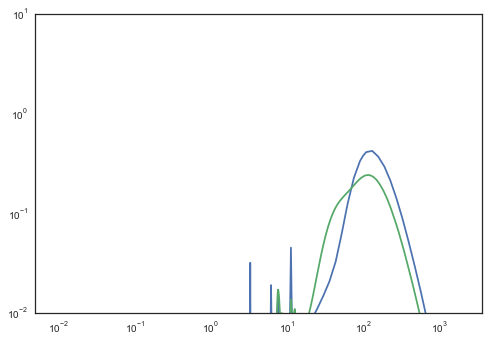

In [54]:
div_test=(4.0*np.pi * np.square(Planck13.luminosity_distance(0.1).cgs))
div_test=div_test.value
plt.loglog(df['wave'],np.power(10.0,8)*(1.0+0.1)*df['0']/div_test)
plt.loglog(dfb['wave'],np.power(10.0,8)*(1.0+0.1)*dfb['Blue_SF_glx.norm_LIR']/div_test)
plt.ylim(0.01,10)

In [48]:
dfb

,wave,Blue_SF_glx.norm_LIR,BroadFIR_SF_glx.norm_LIR,Cold_glx.norm_LIR,Elliptical.norm_LIR,Ly_break.norm_LIR,MIR_powlaw_SF_glx.norm_LIR,MIRex_SF_glx.norm_LIR,Mod_SF_glx.norm_LIR,Obs_SF_glx.norm_LIR,...,Si_break.norm_LIR,Spiral.norm_LIR,Torus.norm_LIR,Type1_AGN_1.norm_LIR,Type2_AGN_1.norm_LIR,Type2_AGN_2.norm_LIR,Warm_SF_glx.norm_LIR,WeakPAH_SF_glx_1.norm_LIR,WeakPAH_SF_glx_2.norm_LIR,Young_SF_glx.norm_LIR
0,0.009100,1.302995e+31,2.205580e+31,6.456699e+33,1.477389e+35,1.539932e+36,1.079182e+32,1.613976e+31,1.009116e+32,5.289167e+31,...,4.706273e+41,6.939039e+14,1.844869e+40,1.949440e+42,8.995525e+27,1.528648e+34,4.808136e+21,1.217179e+31,1.011173e+31,1.116179e+33
1,0.009400,2.410548e+31,4.137099e+31,1.067047e+34,2.347837e+35,2.714404e+36,8.497038e+31,2.938124e+31,1.959359e+32,1.055748e+32,...,4.952793e+41,3.165719e+15,1.897311e+40,2.094512e+42,6.701925e+27,1.331927e+34,1.545787e+22,2.429558e+31,2.023013e+31,2.017934e+33
2,0.009600,3.617449e+31,6.265887e+31,1.497857e+34,3.205934e+35,3.944221e+36,7.253610e+31,4.358698e+31,3.015787e+32,1.655187e+32,...,5.118431e+41,8.428669e+15,1.933860e+40,2.189624e+42,5.501565e+27,1.218336e+34,3.284252e+22,3.817807e+31,3.157077e+31,2.972991e+33
3,0.009800,5.499361e+31,9.416562e+31,2.120216e+34,4.353759e+35,5.832718e+36,6.172541e+31,6.550380e+31,4.734895e+32,2.634855e+32,...,5.285019e+41,2.231870e+16,1.969404e+40,2.292341e+42,4.512279e+27,1.116033e+34,7.020147e+22,6.091494e+31,4.911283e+31,4.447371e+33
4,0.010000,8.051189e+31,1.365967e+32,2.890200e+34,5.733400e+35,8.383374e+36,5.260316e+31,9.501986e+31,7.175600e+32,4.067285e+32,...,5.452485e+41,5.626219e+16,1.999322e+40,2.397878e+42,3.697804e+27,1.023823e+34,1.438448e+23,9.403113e+31,7.460069e+31,6.466231e+33
5,0.010200,1.150961e+32,1.908274e+32,3.811784e+34,7.372464e+35,1.171168e+37,4.499998e+31,1.342811e+32,1.059397e+33,6.088426e+32,...,5.620758e+41,1.356491e+17,2.032746e+40,2.500504e+42,3.027919e+27,9.471641e+33,2.838537e+23,1.410822e+32,1.096335e+32,9.138010e+33
6,0.010400,1.485685e+32,2.520617e+32,4.591922e+34,8.942911e+35,1.477357e+37,4.046491e+31,1.721397e+32,1.405804e+33,8.248430e+32,...,5.789767e+41,2.899234e+17,2.084248e+40,2.611522e+42,2.588276e+27,9.042562e+33,5.011419e+23,1.902560e+32,1.548137e+32,1.174135e+34
7,0.010600,1.970024e+32,3.388845e+32,5.708728e+34,1.104139e+36,1.909987e+37,3.644377e+31,2.261652e+32,1.907523e+33,1.134792e+33,...,5.959446e+41,6.234880e+17,2.140396e+40,2.719184e+42,2.210830e+27,8.686330e+33,8.922890e+23,2.623513e+32,2.194595e+32,1.539085e+34
8,0.010800,2.658933e+32,4.542423e+32,7.190767e+34,1.368547e+36,2.519221e+37,3.310238e+31,3.031529e+32,2.640618e+33,1.592766e+33,...,6.143867e+41,1.349162e+18,2.191442e+40,2.835793e+42,1.887084e+27,8.473682e+33,1.609687e+24,3.699295e+32,3.080280e+32,2.058252e+34
9,0.011000,4.232970e+32,6.969881e+32,1.093234e+35,1.964253e+36,3.751492e+37,3.067588e+31,4.803961e+32,4.155692e+33,2.512405e+33,...,6.315090e+41,3.288530e+18,2.242166e+40,2.948575e+42,1.609641e+27,8.610135e+33,3.218690e+24,5.930029e+32,4.576442e+32,3.093402e+34


In [44]:
SEDs

array([[[  1.08510874e+00,   1.06459148e-08,   2.61169972e-09, ...,
           1.63365948e-17,   1.62167322e-17,   1.60974837e-17],
        [  3.93440774e+01,   3.86333356e-07,   9.48589185e-08, ...,
           7.45085594e-14,   7.04240490e-14,   6.63626272e-14],
        [  3.82574507e+01,   3.84410443e-07,   9.64401676e-08, ...,
           2.00136215e-14,   1.99571217e-14,   1.99008562e-14],
        [  1.87573040e+01,   1.90571477e-07,   4.83699909e-08, ...,
           3.59535413e-14,   3.58260940e-14,   3.56992167e-14],
        [  8.07471570e+00,   8.22522598e-08,   2.09280667e-08, ...,
           6.87298149e-14,   6.84194576e-14,   6.81105724e-14],
        [  2.75951266e+00,   2.81450781e-08,   7.16963998e-09, ...,
           2.20674796e-13,   2.19325749e-13,   2.17983451e-13]],

       [[  1.31541958e+00,   1.26371034e-08,   3.03383362e-09, ...,
           7.66583650e-17,   7.64802913e-17,   7.63028955e-17],
        [  3.33053134e+01,   3.31370685e-07,   8.24342220e-08, ...,
      

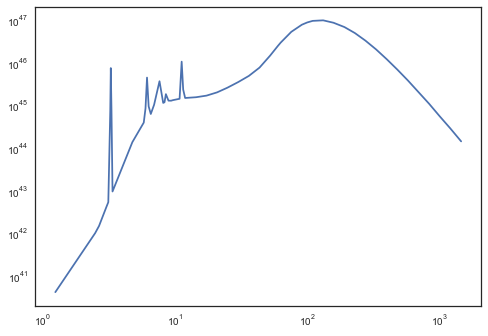

In [42]:
plt.loglog(df['wave'],df['0'])